# Programmable illumination: LED positions

_Srayan Gangopadhyay_  
_Thu 9 Mar 2023_

Sources:
- https://stackoverflow.com/questions/49330080/numpy-2d-array-selecting-indices-in-a-circle
- https://stackoverflow.com/questions/38674027/find-the-row-indexes-of-several-values-in-a-numpy-array
- https://stackoverflow.com/questions/34357617/append-2d-array-to-3d-array-extending-third-dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simulating the LED setup to get the required indices

In [2]:
def plot_mask(arr, mask, titles):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    arr_copy = arr.copy()
    arr_copy[mask] = 1

    sns.heatmap(arr_copy, cmap=['black', 'r'], ax=axs[0])
    axs[0].set_aspect('equal')
    axs[0].set_title(f'{titles[0]} LEDs ({np.count_nonzero(arr_copy)})')
    posns_1 = np.transpose(np.where(arr_copy==1))

    arr_copy = arr.copy()
    arr_copy[~mask] = 1

    sns.heatmap(arr_copy, cmap=['black', 'r'], ax=axs[1])
    axs[1].set_aspect('equal')
    axs[1].set_title(f'{titles[0]} LEDs ({np.count_nonzero(arr_copy)})')
    posns_2 = np.transpose(np.where(arr_copy==1))

    plt.tight_layout()
    plt.show()

    return posns_1, posns_2

In [3]:
def get_led_posns(array_width, circle_radius):
    """
    Given side length of LED array (`array_width`) and radius of circle
    required for darkfield/brightfield split (`circle_radius`), plot
    LED positions, and return positions in array of LEDs for brightfield, 
    darkfield, and top/bottom phase contrast imaging (`XXX_posns`).
    """

    x = np.arange(0, array_width)
    y = np.arange(0, array_width)
    arr = np.zeros((y.size, x.size))

    cx = array_width//2
    cy = array_width//2
    r = circle_radius

    circle_mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    bright_posns, dark_posns = plot_mask(arr, circle_mask, ['Brightfield', 'Darkfield'])

    tb_phase_mask = x < x.size//2
    top_posns, bottom_posns = plot_mask(arr, tb_phase_mask, ['Top', 'Bottom'])

    return bright_posns, dark_posns, top_posns, bottom_posns

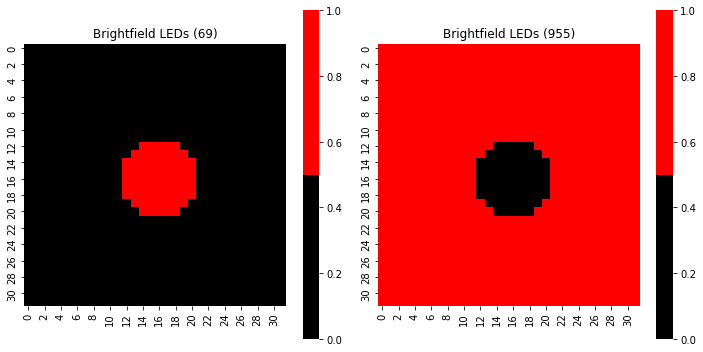

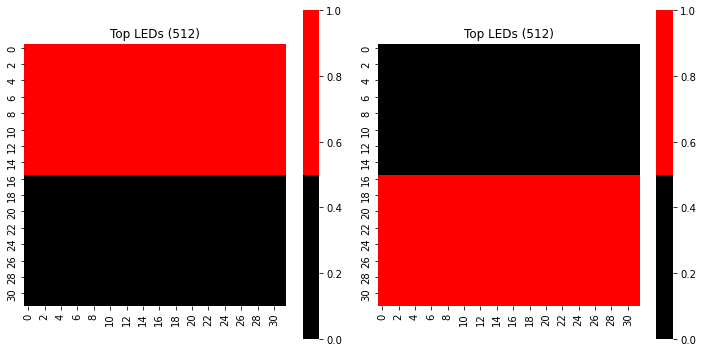

In [4]:
bright_posns, dark_posns, top_posns, bottom_posns = get_led_posns(32, 5)

In [5]:
top_in_bright = np.where((top_posns==bright_posns[:,None]).all(-1))[1]
top_in_dark = np.where((top_posns==dark_posns[:,None]).all(-1))[1]

print(f'Constructing the top phase image requires images\n{top_in_bright}\nfrom the brightfield data, and images\n{top_in_dark}\nfrom the darkfield data.')

Constructing the top phase image requires images
[398 399 400 401 402 429 430 431 432 433 434 435 460 461 462 463 464 465
 466 467 468 492 493 494 495 496 497 498 499 500]
from the brightfield data, and images
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194